In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [3]:
data = pd.read_csv('car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

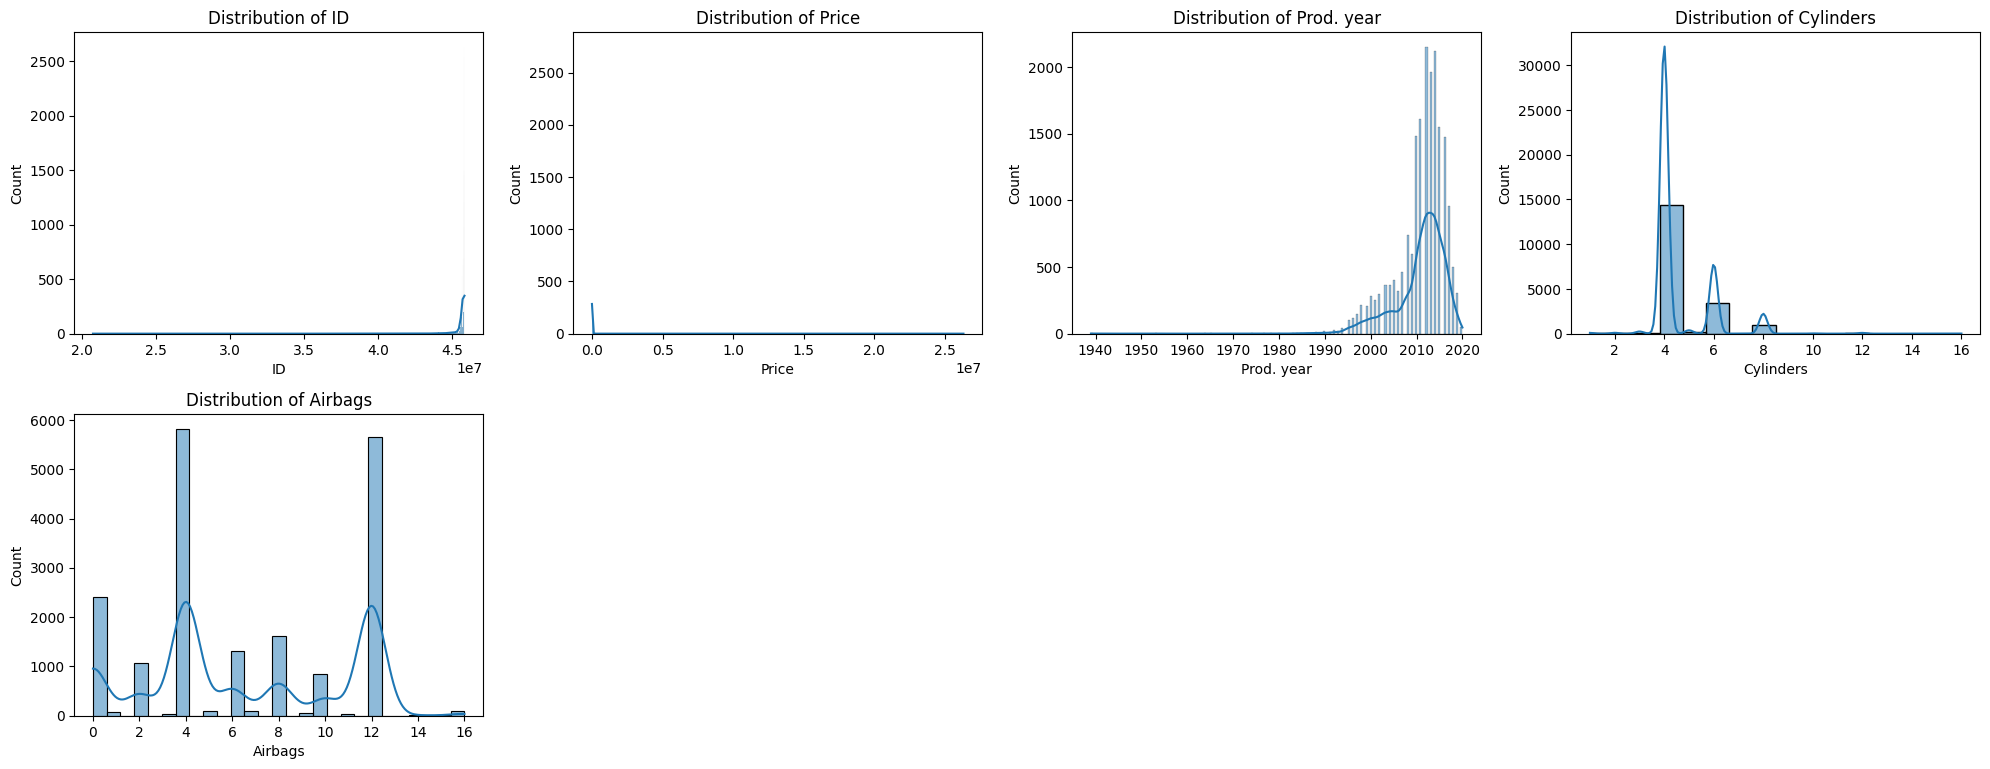

In [6]:
numric_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt  .figure(figsize=(20, 15))
for i, col in enumerate(numric_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

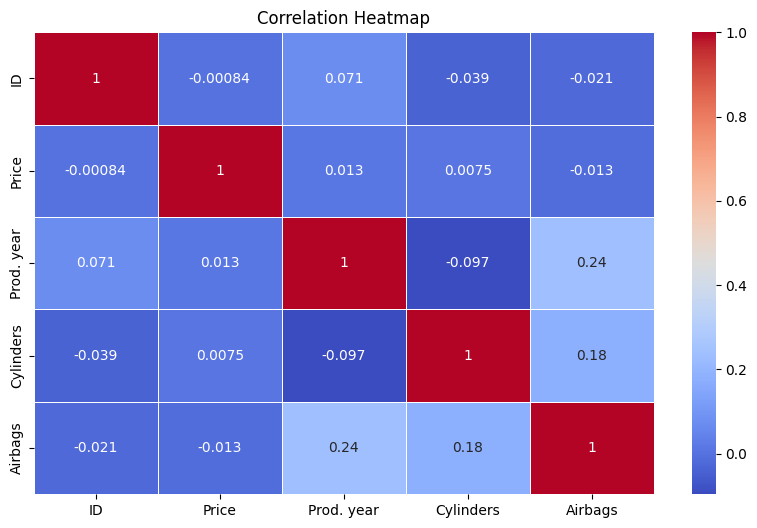

In [7]:
numric_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(data[numric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

In [8]:
outliers = {}
for col in numric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

In [9]:
outliers

{'ID':              ID  Price  Levy   Manufacturer           Model  Prod. year  \
 1      44731507  16621  1018      CHEVROLET         Equinox        2011   
 15     45465200    549  1079         TOYOTA             CHR        2018   
 21     45168471  20698   586         TOYOTA           Prius        2012   
 30     44944581  15681  1288  MERCEDES-BENZ            Vito        2007   
 34     45542380  24462     -           JEEP  Grand Cherokee        2007   
 ...         ...    ...   ...            ...             ...         ...   
 19176  45511664  14113   531        HYUNDAI        Veloster        2012   
 19192  45172859  14113     -          SCION              xD        2010   
 19208  45433278  34811   779         TOYOTA           RAV 4        2013   
 19223  44571028   8781     -          DODGE         Caliber        2008   
 19229  39977395     50     -         TOYOTA           Prius        2008   
 
           Category Leather interior       Fuel type Engine volume    Mileage  \

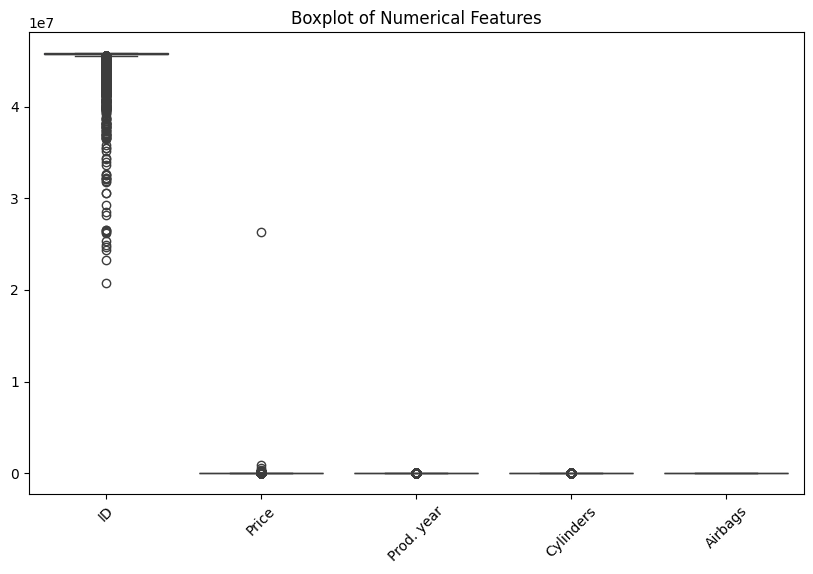

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numric_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [11]:
data.duplicated().sum()

np.int64(313)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(18924, 18)

In [15]:
data.select_dtypes(include=['object']).describe()


,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5709,3729,1069,8600,13731,9944,3856,714,13282,12695,18032,17471,4944


* ال - متكررة كثير هالي تعتبر missing

In [16]:
def top_and_bottom_combined(df, column, n=5):
    top_n = df[column].value_counts().head(n)
    bottom_n = df[column].value_counts().tail(n)
    combined = pd.concat([top_n, bottom_n])
    return combined


for col in data.select_dtypes(include=['object']):
    print(f"Top and Bottom {col}:\n{top_and_bottom_combined(data, col)}\n")
    print("-" * 50)
    
    
    # فكره هاي ال الوظيفه انها بتاخد الداتا والعمود اللي عايز اعرف اكتر 5 قيم شيوعا واكتر 5 قيم نادره في العمود ده وبترجعهم في شكل جدول واحد. يعني مثلا لو عندي عمود اسمه "Brand" هتطلعلي اكتر 5 ماركات سيارات شيوعا واكتر 5 ماركات سيارات نادره في العمود ده.
    

Top and Bottom Levy:
Levy
-       5709
765      482
891      453
639      403
640      398
2308       1
4860       1
1641       1
1045       1
1901       1
Name: count, dtype: int64

--------------------------------------------------
Top and Bottom Manufacturer:
Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, dtype: int64

--------------------------------------------------
Top and Bottom Model:
Model
Prius               1069
Sonata              1067
Camry                929
Elantra              910
E 350                534
Vito Exstralong        1
Versa SE               1
Fusion HYBRID SE       1
C30                    1
Optima k5              1
Name: count, dtype: int64

--------------------------------------------------
Top and Bottom Category:
Category
Sedan          8600
Jeep           5

In [4]:
data['Levy'].replace({'-': 0}, inplace=True)
data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce')

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\1202643877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Levy'].replace({'-': 0}, inplace=True)


In [6]:
data['Levy'].info

<bound method Series.info of 0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: int64>

In [7]:
data['Engine volume']=data['Engine volume'].str.replace('Turbo', '')
data['Engine volume'] = pd.to_numeric(data['Engine volume'], errors='coerce')

In [9]:
data['Engine volume'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Engine volume
Non-Null Count  Dtype  
--------------  -----  
19237 non-null  float64
dtypes: float64(1)
memory usage: 150.4 KB


In [11]:
data['Mileage']=data['Mileage'].str.replace('km', '')
data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')

# Distribution of variables

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


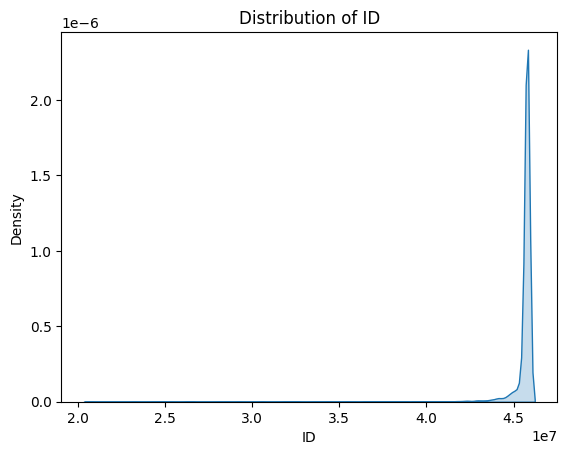

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


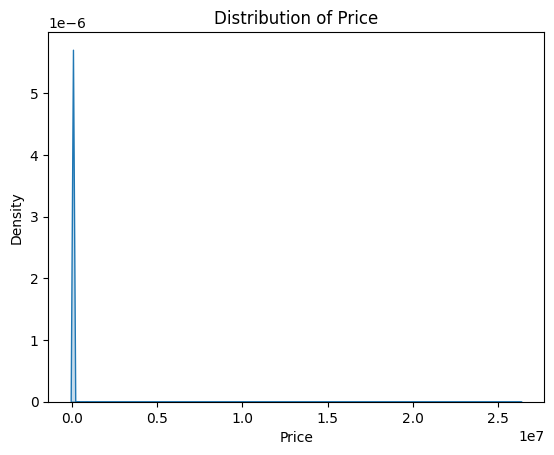

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


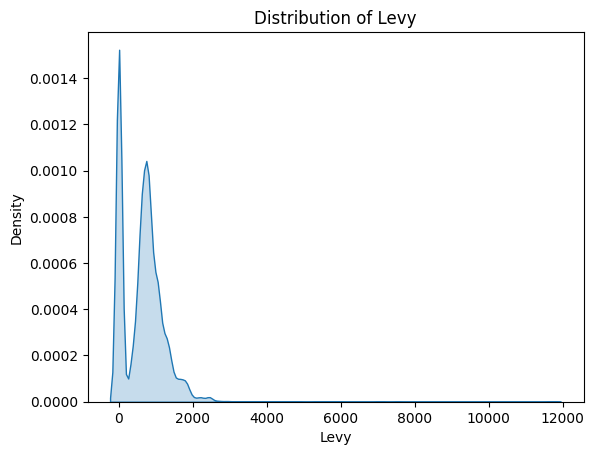

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


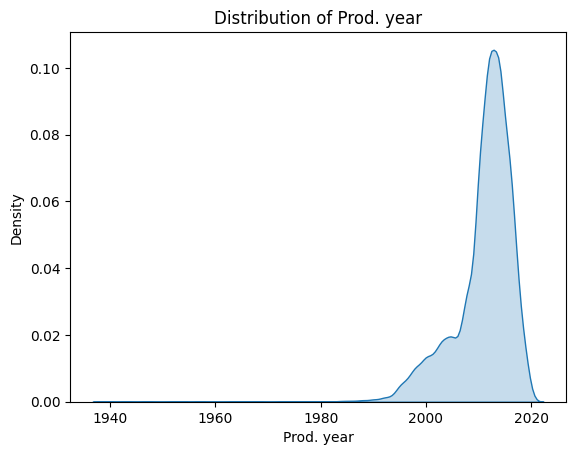

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


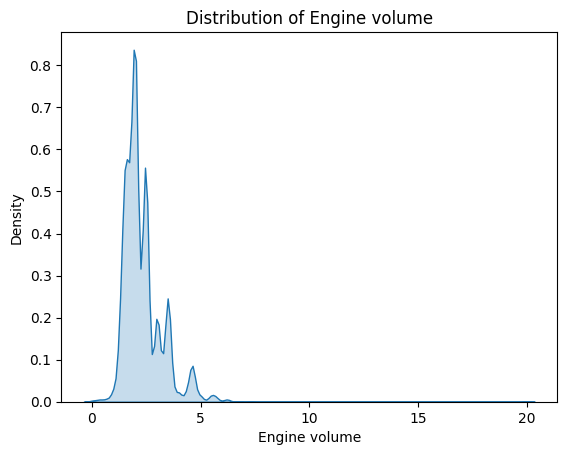

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


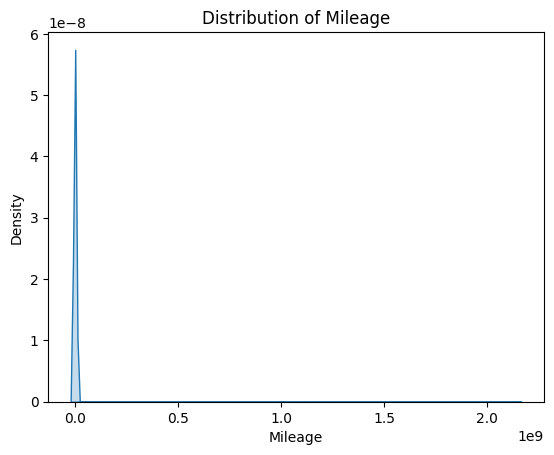

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


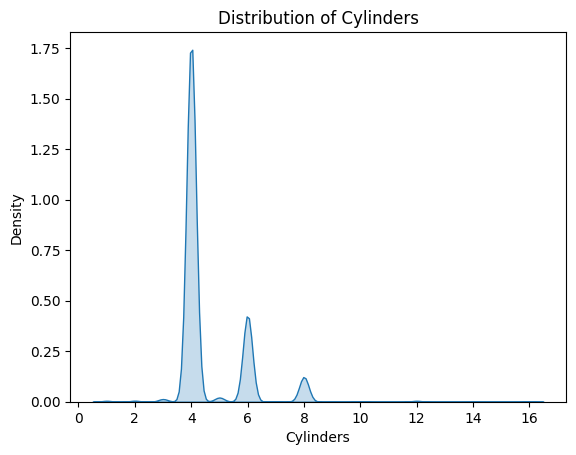

C:\Users\owndi\AppData\Local\Temp\ipykernel_12692\2850266413.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


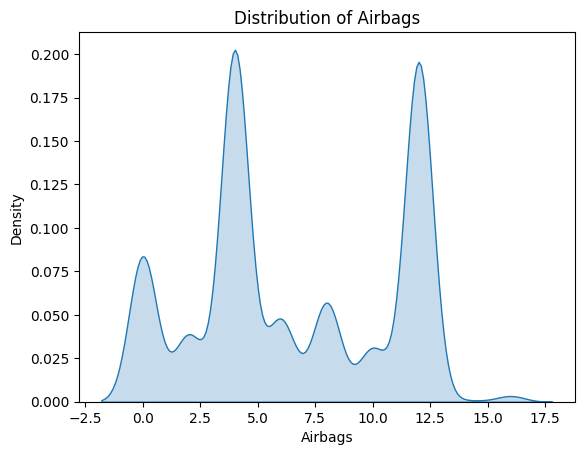

In [12]:
for col in data.select_dtypes('number').columns:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    

C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Mileage', ylabel='Density'>

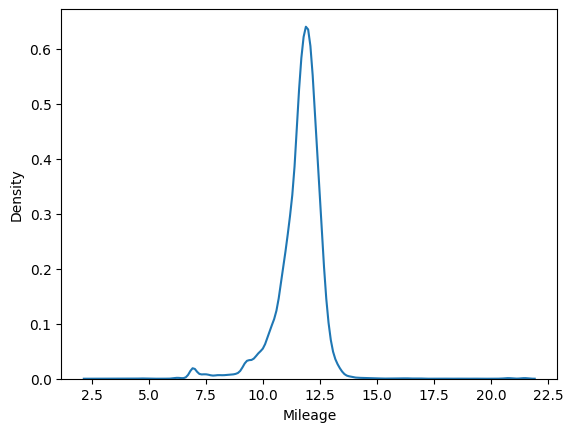

In [13]:
sns.kdeplot(np.log(data['Mileage']))

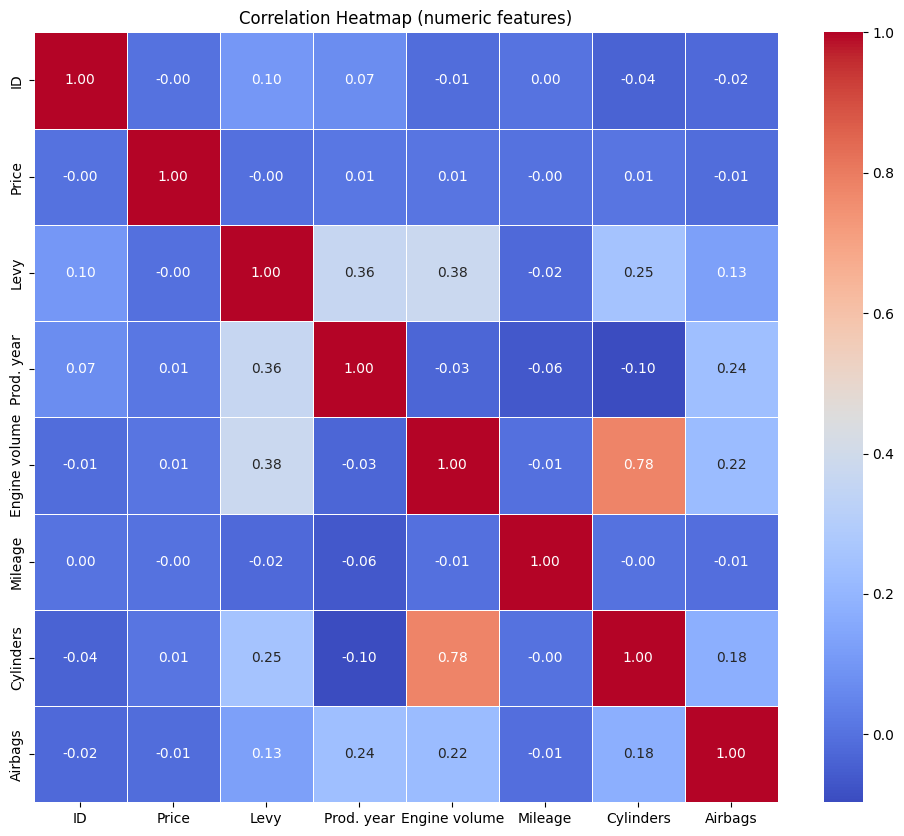

In [17]:
plt.figure(figsize=(12,10))
numeric_cols = data.select_dtypes(include=['number']).columns
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (numeric features)')
plt.show()

# Feature Interaction

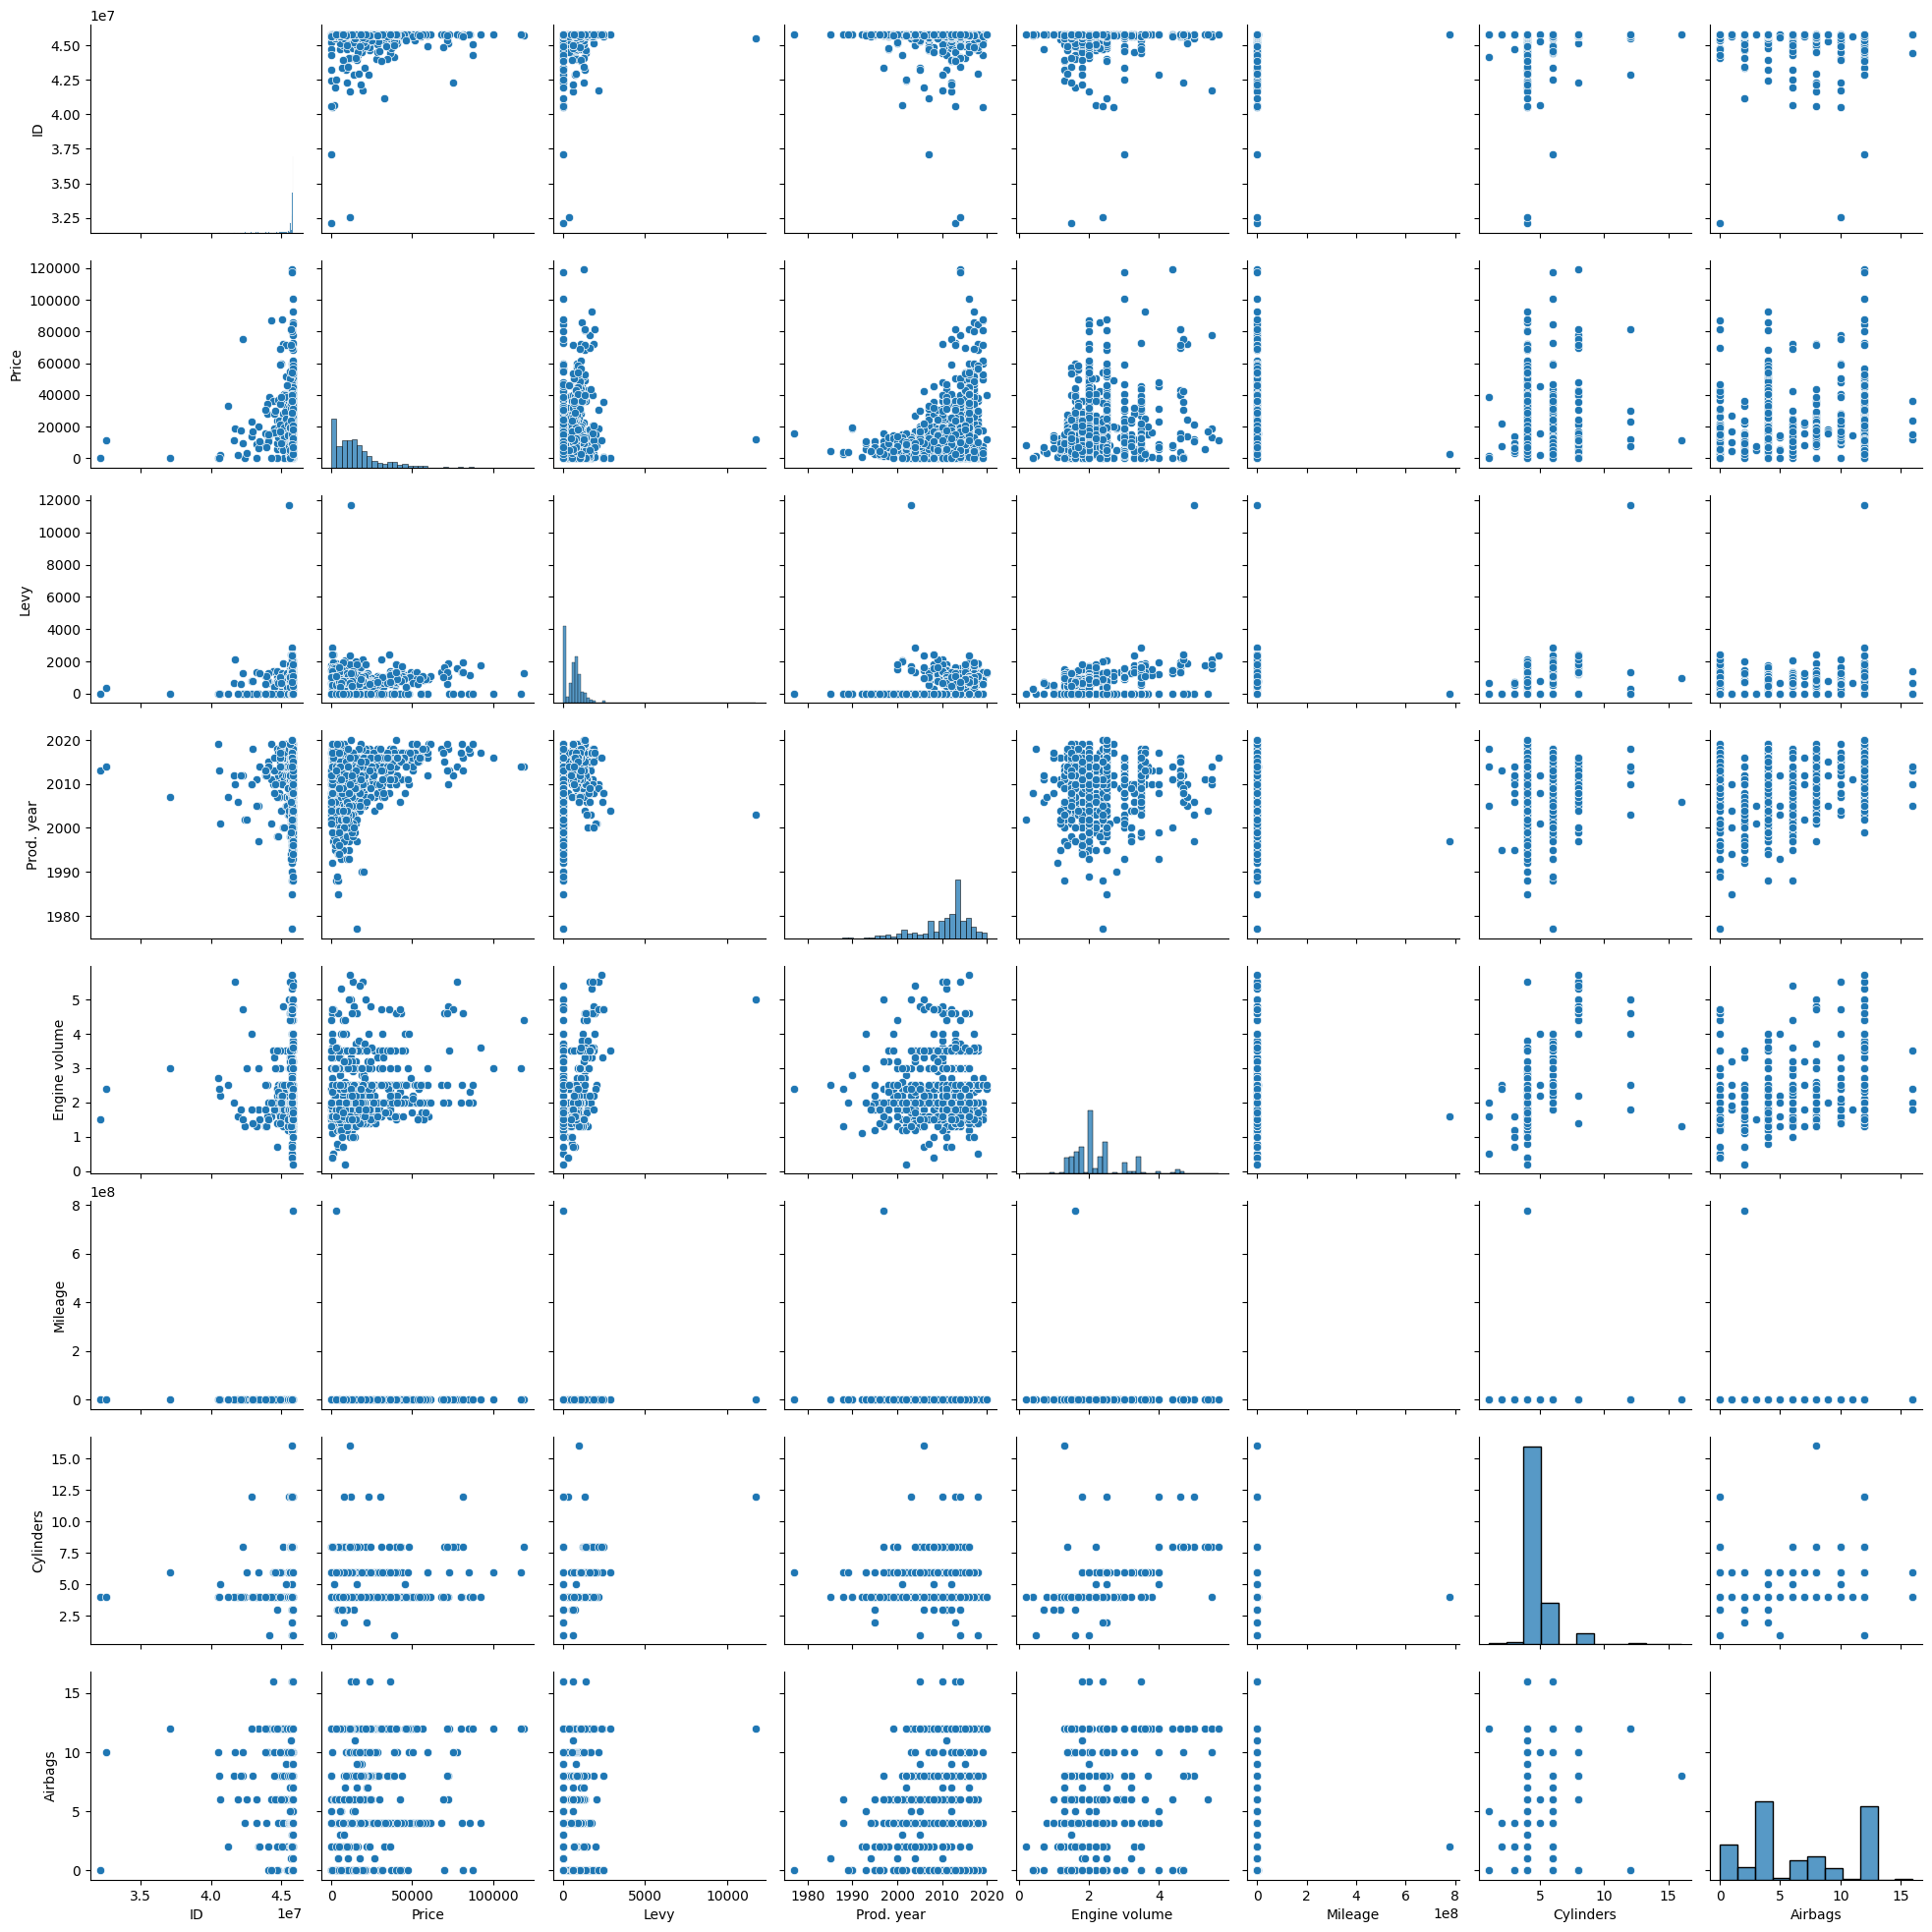

In [18]:
sns.pairplot(data[:1000])
plt.show()

<Axes: ylabel='Price'>

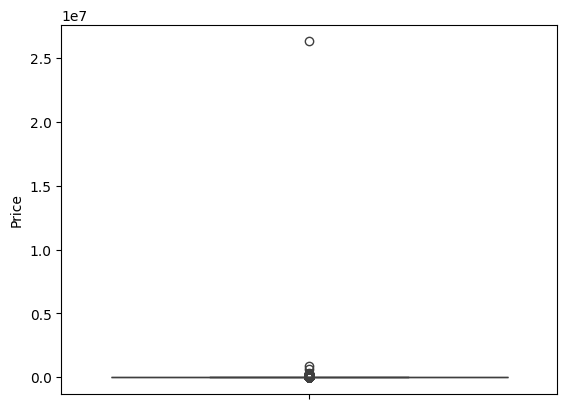

In [20]:
sns.boxplot(data['Price'])

<Axes: ylabel='Mileage'>

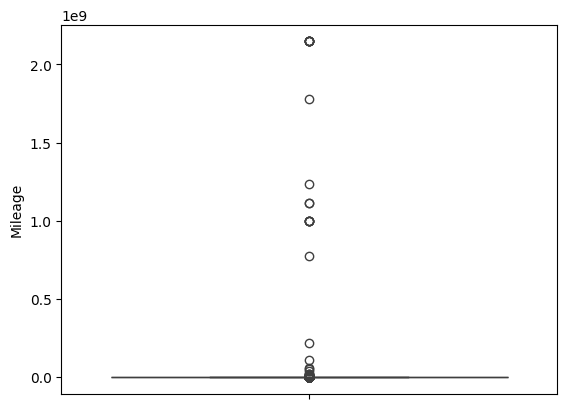

In [21]:
sns.boxplot(data['Mileage'])

<Axes: ylabel='Levy'>

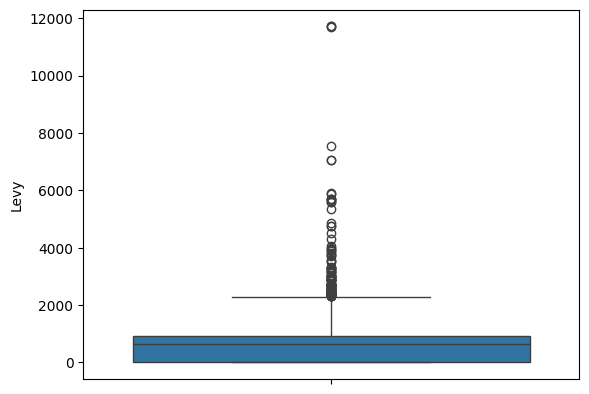

In [22]:
sns.boxplot(data['Levy'])

In [23]:
def clean_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

In [ ]:
data=clean_outliers(data,'Price')
data=clean_outliers(data,'Mileage')
data=clean_outliers(data,'Levy')
